In [2]:
import pickle
import igraph
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
plt.style.use('seaborn-white')
plt.rc('font', size=70) 

In [3]:
fields = ['economics', 'management', 'psychology', 'political_science', 'aps', 'cs']
fields = ['management', 'aps', 'psychology', 'political_science', 'economics', 'cs']

In [4]:
cp = sns.color_palette("Set1")
field_color = {
    'economics': cp[0],
    'management': cp[1],
    'psychology': cp[7],
    'aps': cp[3],
    'political_science': cp[2],
    'cs': cp[4]
}
field_label = {
    'economics': 'Economics',
    'management': 'Management',
    'psychology': 'Psychology',
    'aps': 'Physics (APS)',
    'political_science': 'Political Science',
    'cs': 'Computer Science'
}
field_marker = {
    'economics': 'o',
    'management': 's',
    'psychology': '^',
    'aps': '>',
    'political_science': 'd',
    'cs': '<'
    
}

# Power Inequality 

In [ ]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, se

In [ ]:
years = range(1990, 2020)

for y in np.arange(0, 1.0, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))

for y in np.arange(1, 3, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

for field in fields:
    homophily, freq, _, _ = pickle.load(open("../power/gender_{}_1990.pkl".format(field), "rb"))

    x, power = [], []
    min_min_agg, min_maj_agg, maj_min_agg, maj_maj_agg = 0, 0, 0, 0
    power_agg = [] 
    for year in years:
        if year in homophily:
            x.append(year)
            min_min, min_maj = homophily[year]['times'][('minority', 'minority')], homophily[year]['times'][('minority', 'majority')]
            maj_maj, maj_min = homophily[year]['times'][('majority', 'majority')], homophily[year]['times'][('majority', 'minority')]
            power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min))) # out / in 
            min_min_agg += min_min
            min_maj_agg += min_maj
            maj_min_agg += maj_min
            maj_maj_agg += maj_maj 
            power_agg.append(((min_min_agg + maj_min_agg) / (min_min_agg + min_maj_agg)) / ((maj_maj_agg + min_maj_agg) / (maj_maj_agg + maj_min_agg)))
    
    
    pw = [[] for ind in range(len(power))]
    for ind in range(len(power) - 1, 0, -1):
        pw[ind].append(power[ind])
        if ind > 2:
            pw[ind].append(power[ind - 3])
        if ind > 1:
            pw[ind].append(power[ind - 2])
        if ind > 0:
            pw[ind].append(power[ind - 1])
        
    y, yerr = [], []
    for ind in range(len(power)):
        m, h = mean_confidence_interval(pw[ind])
        y.append(m)
        yerr.append(h)
    
    plt.errorbar(x[5:], power_agg[5:], color='gray', marker=field_marker[field], markersize=9, zorder=2, alpha=0.5, linestyle=':')
    plt.errorbar(x[5:], y[5:], yerr=yerr[5:], color=field_color[field], marker=field_marker[field], label=field_label[field], markersize=10, zorder=1)

plt.hlines(1, xmin=years[5], xmax=years[-1], linestyle='-.', label='Equality', color='black')
plt.xticks(years[5:], years[5:], rotation=90, fontsize=20)
plt.yscale('log')
tck = [0.50, 0.60, 0.70, 0.80, 0.90, 1.0, 2.0, 3.0, 4.0]
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Gender Power Inequality", fontsize=20)
plt.legend(prop={'size': 20}, facecolor='white', framealpha=1, frameon=True)

plt.xlim(1994, 2020)
plt.ylim(0.49, 2.1)

# plt.gca().grid(zorder=2, color='lightgray', linestyle='-', linewidth=2)

plt.gcf().set_size_inches(13, 10, forward=True)
plt.savefig("gender_power_gray.pdf", bbox_inches='tight')

In [ ]:
years = range(1990, 2020)
for y in np.arange(0, 1.0, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))

for y in np.arange(1, 5, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

for field in fields:
    homophily, freq, _, _ = pickle.load(open("../power/affiliation_{}_1990_100.pkl".format(field), "rb"))

    x, power = [], []
    min_min_agg, min_maj_agg, maj_min_agg, maj_maj_agg = 0, 0, 0, 0
    power_agg = [] 
    for year in years:
        if year in homophily:
            x.append(year)
            min_min, min_maj = homophily[year]['times'][('minority', 'minority')], homophily[year]['times'][('minority', 'majority')]
            maj_maj, maj_min = homophily[year]['times'][('majority', 'majority')], homophily[year]['times'][('majority', 'minority')]
            power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min))) # out / in 
            min_min_agg += min_min
            min_maj_agg += min_maj
            maj_min_agg += maj_min
            maj_maj_agg += maj_maj 
            power_agg.append(((min_min_agg + maj_min_agg) / (min_min_agg + min_maj_agg)) / ((maj_maj_agg + min_maj_agg) / (maj_maj_agg + maj_min_agg)))
    
    
    pw = [[] for ind in range(len(power))]
    for ind in range(len(power) - 1, 0, -1):
        pw[ind].append(power[ind])
        if ind > 2:
            pw[ind].append(power[ind - 3])
        if ind > 1:
            pw[ind].append(power[ind - 2])
        if ind > 0:
            pw[ind].append(power[ind - 1])
        
    y, yerr = [], []
    for ind in range(len(power)):
        m, h = mean_confidence_interval(pw[ind])
        y.append(m)
        yerr.append(h)
    
    plt.errorbar(x[5:], power_agg[5:], color='gray', marker=field_marker[field], markersize=9, zorder=2, alpha=0.5, linestyle=':')
    plt.errorbar(x[5:], y[5:], yerr=yerr[5:], color=field_color[field], marker=field_marker[field], label=field_label[field], markersize=10, zorder=3)
#     plt.errorbar(years, power, color=field_color[field], marker='o', label=field)

plt.hlines(1, xmin=years[5], xmax=years[-1], linestyle='-.', label='Equality', zorder=3, color='black')
plt.xticks(years[5:], years[5:], rotation=90, fontsize=20)
plt.yscale('log')
tck = [0.50, 0.60, 0.70, 0.80, 0.90, 1.0, 2.0, 3.0, 4.0]
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Affiliation Power Inequality", fontsize=20)

# plt.gca().grid(zorder=2, color='lightgray', linestyle='-', linewidth=2)

plt.xlim(1994, 2020)
plt.ylim(0.69, 4.1)
plt.gcf().set_size_inches(13, 10, forward=True)
plt.savefig("aff_power_gray.pdf", bbox_inches='tight')

# Networks 

In [ ]:
def show_graph_circ(G, genders, plot_name):
    node_color_dict = {
        'minority': (0.7350766252941177, 0.10445963105882351, 0.17149230125490195, 1.0),
        'majority': (0.37355243129411764, 0.4974987054117647, 0.9094673695294118, 1.0)
    }
    edge_color_dict = {
        'minority': (0.7350766252941177, 0.10445963105882351, 0.17149230125490195, 0.3),
        'majority': (0.37355243129411764, 0.4974987054117647, 0.9094673695294118, 0.3)
    }
    G.vs["type"] = [genders[v['name']] =='minority' for v in G.vs]
    G.vs["color"] = [node_color_dict[genders[v['name']]] for v in G.vs]
    G.es["color"] = [edge_color_dict[genders[G.vs[edge.source]['name']]] for edge in G.es]
    visual_style = {}
    visual_style["vertex_size"] = 10
    visual_style["bbox"] = (600, 600, 0, 15)
    visual_style["margin"] = 40
    visual_style["edge_arrow_size"] = 0.5
    visual_style["edge_width"] = 1 + np.log(np.array(G.es['weight']) + 1)
    fig, ax = plt.subplots()
    li = []
    for v in G.vs:
        li.append((v['type'], v.index))
    order = [e for _, e in sorted(li)]
    output = '{}_network_circle.pdf'.format(plot_name)
    igraph.plot(G, target=output, **visual_style, layout=G.layout_circle(order=order))
    
    print ("Network saved in {}".format(output))

In [ ]:
gen = pd.read_csv("gender_show.csv")
E = gen.groupby(['to_author', 'from_author'], as_index=False)['times'].sum()
G = igraph.Graph.TupleList(E.values, directed = True, edge_attrs=['weight'])
genders = dict(zip(gen['from_author'], gen['from_author_gender']))
genders.update(dict(zip(gen['to_author'], gen['to_author_gender'])))
show_graph_circ(G, genders, "gender")

In [ ]:
aff = pd.read_csv("affiliation_show.csv")
E = aff.groupby(['to_author', 'from_author'], as_index=False)['times'].sum()
G = igraph.Graph.TupleList(E.values, directed = True, edge_attrs=['weight'])
genders = dict(zip(aff['from_author'], aff['from_author_node_attr']))
genders.update(dict(zip(aff['to_author'], aff['to_author_node_attr'])))
show_graph_circ(G, genders, "affiliation")

# Elite Universities

[1.10708135 1.11260003 1.12465725 1.11935045]
[1.21002707 1.19170157 1.18044451 1.16465708]
[1.35215988 1.31654034 1.25944845 1.21890984]
[1.15829125 1.16249697 1.16704047 1.14426578]
[1.12476772 1.12858478 1.13290115 1.12130673]
[1.18903357 1.19279674 1.18426222 1.18464356]


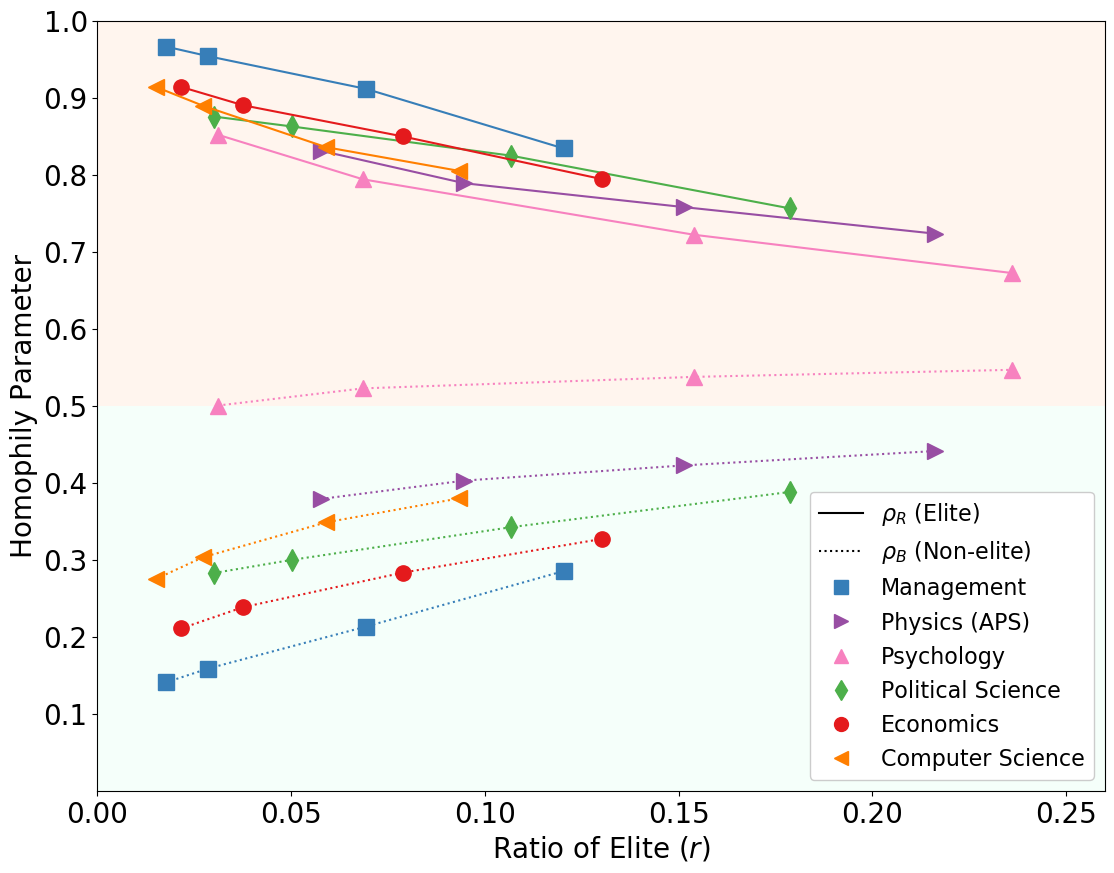

In [116]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.clf()

xmin, xmax = 0.0, 0.26
for h in np.arange(0, 0.5, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
    
for h in np.arange(0.5, 1.0, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

leg_lines = []
leg_lines.append(mlines.Line2D([], [], color='black', label=r'$\rho_R$ (Elite)'))
leg_lines.append(mlines.Line2D([], [], color='black', label=r'$\rho_B$ (Non-elite)', linestyle=':'))
for field in fields:
    
    tops = [10, 20, 50, 100]
    x, ru_r, ru_b = [], [], []
    for top in tops:
        file = "../params/affiliation_{}_1990_{}.pkl".format(field, top)
        out = pickle.load(open(file, "rb"))
        
        x.append(out[0]['R'])
        ru_r.append(out[0]['E3'][1][1])
        ru_b.append(out[0]['E3'][0][0])
    plt.errorbar(x, ru_r, marker=field_marker[field], color=field_color[field], markersize=11)#, label='{}'.format(field_label[field]))
    plt.errorbar(x, ru_b, marker=field_marker[field], color=field_color[field], linestyle=':', markersize=11)
    print (np.array(ru_r) + np.array(ru_b))
    leg_lines.append(mlines.Line2D([], [], color=field_color[field], marker=field_marker[field], markersize=10, label=field_label[field], linestyle='None'))

plt.xlim(xmin, xmax)
plt.ylim(0, 1.0)
# plt.hlines(0.5, xmin=xmin, xmax=xmax, linestyle=':', zorder=3, color='black')

tck = np.arange(0.1, 1.1, 0.1)
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)

tck = np.arange(0, 0.26, 0.05)
plt.xticks(tck, ["{0:.2f}".format(el) for el in tck], fontsize=20)

plt.xlabel('Ratio of Elite ($r$)', fontsize=20)
plt.ylabel('Homophily Parameter', fontsize=20)
plt.gcf().set_size_inches(13, 10, forward=True)
plt.legend(handles=leg_lines, prop={'size': 16}, facecolor='white', framealpha=1, frameon=True)
plt.savefig("top_uni_homo.pdf", bbox_inches='tight')
plt.show()

In [ ]:
xmin, xmax = 0.0, 0.26
for h in np.arange(0.9, 1, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
    
for h in np.arange(1, 10, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

for field in fields:
    x, power = [], []
    for top in [10, 20, 50, 100]:
        homophily, _, groups, _ = pickle.load(open("../power/affiliation_{}_1990_{}.pkl".format(field, top), "rb"))
        min_min, min_maj, maj_min, maj_maj = 0, 0, 0, 0 
        for year in range(1990, 2020):
            if year in homophily:
                min_min += homophily[year]['times'][('minority', 'minority')]
                min_maj += homophily[year]['times'][('minority', 'majority')]
                maj_maj += homophily[year]['times'][('majority', 'majority')]
                maj_min += homophily[year]['times'][('majority', 'minority')]
        min_ratio = sum([1 for x in groups.values() if x == 'minority']) / len(groups)
        x.append(min_ratio)
        power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min)))

    plt.errorbar(x, power, color=field_color[field], marker=field_marker[field], markersize=15, zorder=3, label=field_label[field])

plt.hlines(1, xmin=xmin, xmax=xmax, linestyle='-.', label='Equality', zorder=3, color='black')

tck = np.arange(xmin, xmax, 0.05)
plt.xticks(tck, ["{0:.2f}".format(el) for el in tck], fontsize=20)

plt.yscale('log')
tck = range(1, 10)
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Affiliation Power Inequality", fontsize=20)
plt.xlabel('Ratio of Elite ($r$)', fontsize=20)
plt.legend(prop={'size': 16}, facecolor='white', framealpha=1, frameon=True)
plt.xlim(xmin, xmax)
plt.ylim(0.9, 10)
plt.gcf().set_size_inches(13, 10, forward=True)
plt.savefig("top_uni_power.pdf", bbox_inches='tight')


In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.clf()

xmin, xmax = 0.0, 0.26
for h in np.arange(0, 0.5, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
    
for h in np.arange(0.5, 1.0, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

leg_lines = []
leg_lines.append(mlines.Line2D([], [], color='black', label=r'$\rho_R$ (Elite)'))
leg_lines.append(mlines.Line2D([], [], color='black', label=r'$\rho_B$ (Non-elite)', linestyle=':'))
for field, delta in [('management', 1000), ('aps', 1000), ('psychology', 1000), ('political_science', 10), ('economics', 1000), ('cs', 1000)]:
    
    tops = [10, 20, 50, 100]
    x, ru_r, ru_b = [], [], []
    for top in tops:
        file = "../params/d{}_affiliation_{}_1990_t{}.pkl".format(delta, field, top)
        out = pickle.load(open(file, "rb"))
        
        x.append(out[0]['R'])
        ru_r.append(out[0]['E3'][1][1])
        ru_b.append(out[0]['E3'][0][0])
    plt.errorbar(x, ru_r, marker=field_marker[field], color=field_color[field], markersize=11)#, label='{}'.format(field_label[field]))
    plt.errorbar(x, ru_b, marker=field_marker[field], color=field_color[field], linestyle=':', markersize=11)
    print (np.array(ru_r) + np.array(ru_b))
    leg_lines.append(mlines.Line2D([], [], color=field_color[field], marker=field_marker[field], markersize=10, label=field_label[field], linestyle='None'))

plt.xlim(xmin, xmax)
plt.ylim(0, 1.0)
# plt.hlines(0.5, xmin=xmin, xmax=xmax, linestyle=':', zorder=3, color='black')

tck = np.arange(0.1, 1.1, 0.1)
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)

tck = np.arange(0, 0.26, 0.05)
plt.xticks(tck, ["{0:.2f}".format(el) for el in tck], fontsize=20)

plt.xlabel('Ratio of Elite ($r$)', fontsize=25)
plt.ylabel('Homophily Parameter', fontsize=25)
plt.gcf().set_size_inches(13, 10, forward=True)
plt.legend(handles=leg_lines, prop={'size': 16}, facecolor='white', framealpha=1, frameon=True)
plt.savefig("top_uni_homo_new.pdf", bbox_inches='tight')
plt.show()

In [ ]:
xmin, xmax = 0.0, 0.26
for h in np.arange(0.5, 1, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
    
for h in np.arange(1, 10, 0.01):
    rec = Rectangle((xmin, h), xmax-xmin, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))
    
for field, delta in [('management', 1000), ('aps', 1000), ('psychology', 1000), ('political_science', 10), ('economics', 1000), ('cs', 1000)]:
    x, power = [], []
    for top in [10, 20, 50, 100]:
        homophily, _, groups, _ = pickle.load(open("../power/d{}_affiliation_{}_1990_t{}.pkl".format(delta, field, top), "rb"))
        min_min, min_maj, maj_min, maj_maj = 0, 0, 0, 0 
        for year in range(1990, 2020):
            if year in homophily:
                min_min += homophily[year]['times'][('minority', 'minority')]
                min_maj += homophily[year]['times'][('minority', 'majority')]
                maj_maj += homophily[year]['times'][('majority', 'majority')]
                maj_min += homophily[year]['times'][('majority', 'minority')]
        min_ratio = sum([1 for x in groups.values() if x == 'minority']) / len(groups)
        x.append(min_ratio)
        power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min)))

    plt.errorbar(x, power, color=field_color[field], marker=field_marker[field], markersize=15, zorder=3, label=field_label[field])

plt.hlines(1, xmin=xmin, xmax=xmax, linestyle='-.', label='Equality', zorder=3, color='black')

tck = np.arange(xmin, xmax, 0.05)
plt.xticks(tck, ["{0:.2f}".format(el) for el in tck], fontsize=20)

plt.yscale('log')
tck = [0.6, 0.8] + [x for x in range(1, 10)]
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Affiliation Power Inequality", fontsize=25)
plt.xlabel('Ratio of Elite ($r$)', fontsize=25)
plt.legend(prop={'size': 16}, facecolor='white', framealpha=1, frameon=True)
plt.xlim(xmin, xmax)
plt.ylim(0.5, 10)
plt.gcf().set_size_inches(13, 10, forward=True)
plt.savefig("top_uni_power_new.pdf", bbox_inches='tight')
plt.show()

In [ ]:
years = range(1990, 2020)
# for field in 'aps':
top_alpha = {
    10: 1.0,
    20: 0.6,
    50: 0.4,
    100: 0.2,
}
for field in fields[:-1]:
    for top in [10, 20, 50, 100]:
        homophily, freq, _, _ = pickle.load(open("../power/affiliation_{}_1990_{}.pkl".format(field, top), "rb"))

        x, power = [], []
        for year in years:
            if year in homophily:
                x.append(year)
                min_min, min_maj = homophily[year]['times'][('minority', 'minority')], homophily[year]['times'][('minority', 'majority')]
                maj_maj, maj_min = homophily[year]['times'][('majority', 'majority')], homophily[year]['times'][('majority', 'minority')]
                power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min))) # out / in 


        pw = [[] for ind in range(len(power))]
        for ind in range(len(power) - 1, 0, -1):
            pw[ind].append(power[ind])
            if ind > 2:
                pw[ind].append(power[ind - 3])
            if ind > 1:
                pw[ind].append(power[ind - 2])
            if ind > 0:
                pw[ind].append(power[ind - 1])

        y, yerr = [], []
        for ind in range(len(power)):
            m, h = mean_confidence_interval(pw[ind])
            y.append(m)
            yerr.append(h)

        plt.errorbar(x[5:], y[5:], yerr=yerr[5:], color=field_color[field], marker=field_marker[field], markersize=10, zorder=3, alpha=top_alpha[top])
#     plt.errorbar(years, power, color=field_color[field], marker='o', label=field)

plt.hlines(1, xmin=years[5], xmax=years[-1], linestyle='-.', label='Equality', zorder=3, color='black')
plt.xticks(years[5:], years[5:], rotation=90, fontsize=20)
plt.yscale('log')
tck = range(1, 10)
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Affiliation Power Inequality", fontsize=20)

# plt.gca().grid(zorder=2, color='lightgray', linestyle='-', linewidth=2)

plt.xlim(1994, 2020)
plt.ylim(0.9, 10)
plt.gcf().set_size_inches(13, 10, forward=True)

# Changes over time 

In [ ]:
best_delta = {
    'aps': '0',
    'management': '0',
    'psychology': '0',
    'political_science': '0',
    
}

In [ ]:
for field in best_delta.keys():
    params_by_year = pickle.load(open("../params/yearly/d0_gender_{}_1990.pkl".format(field), "rb"))
    
    y = []
    to_year = max(list(params_by_year.keys()))
    print (to_year)
    for year in range(1990, to_year + 1):
        in_ratio = params_by_year[year]['ri'] / (params_by_year[year]['ri'] + params_by_year[year]['bi'])  
        y.append(in_ratio)
    plt.errorbar(range(1990, to_year + 1), y, label='{}'.format(field))
plt.ylabel('Ri / (Ri + Bi)')
plt.legend()

In [ ]:
for field in best_delta.keys():
    params_by_year = pickle.load(open("../params/yearly/d0_gender_{}_1990.pkl".format(field), "rb"))
    
    y = []
    to_year = max(list(params_by_year.keys()))
    print (to_year)
    for year in range(1990, to_year + 1):
        out_ratio = params_by_year[year]['ro'] / (params_by_year[year]['ro'] + params_by_year[year]['bo']) 
        y.append(out_ratio)
    plt.errorbar(range(1990, to_year + 1), y, label='{}'.format(field))
plt.ylabel('Ro / (Ro + Bo)')
plt.legend()

In [ ]:
params_by_year[1990]['counter_agg'][2]

In [ ]:
for field in best_delta.keys():
    params_by_year = pickle.load(open("../params/yearly/d0_gender_{}_1990.pkl".format(field), "rb"))
    
    y = []
    to_year = max(list(params_by_year.keys()))
    for year in range(1990, to_year + 1):
        homo = params_by_year[year]['counter_agg'][2][1][0] / params_by_year[year]['counter_agg'][2][1][1]
        y.append(homo)
    plt.errorbar(range(1990, to_year + 1), y, label='{}'.format(field))
plt.ylabel('rr / ?r')
plt.legend()

In [ ]:
for field in best_delta.keys():
    params_by_year = pickle.load(open("../params/yearly/d0_gender_{}_1990.pkl".format(field), "rb"))
    
    y = []
    to_year = max(list(params_by_year.keys()))
    for year in range(1990, to_year + 1):
        homo = params_by_year[year]['counter_agg'][2][0][0] / params_by_year[year]['counter_agg'][2][0][1]
        y.append(homo)
    plt.errorbar(range(1990, to_year + 1), y, label='{}'.format(field))
plt.ylabel('bb / ?b')
plt.legend()

In [1]:
cp = sns.color_palette("Set1")
field_color = {
    'economics': cp[0],
    'management': cp[1],
    'psychology': cp[7],
    'aps': cp[3],
    'political_science': cp[2],
    'cs': cp[4]
}
field_label = {
    'economics': 'Economics',
    'management': 'Management',
    'psychology': 'Psychology',
    'aps': 'Physics (APS)',
    'political_science': 'Political Science',
    'cs': 'Computer Science'
}
field_marker = {
    'economics': 'o',
    'management': 's',
    'psychology': '^',
    'aps': '>',
    'political_science': 'd',
    'cs': '<'
    
}

NameError: name 'sns' is not defined

In [234]:
def plot_table(p, q, rho_r, rho_b, I_empirical, I_theoretical, name, gender=0):
    
    if gender == 0:
        xjump = 0.3 / 30 
        yjump = 0.3 / 30 
    else:
        xjump = 0.45 / 30 
        yjump = 0.35 / 30
    
    for y in np.arange(0, 0.5, 2 * yjump):
        rec = Rectangle((0, y), 1.0, yjump)
        ax[gender][1].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=0.9, zorder=1))
        
        rec = Rectangle((0, 0.5 + y), 1.0, yjump)
        ax[gender][1].add_collection(PatchCollection([rec], facecolor='seashell', alpha=0.9, zorder=1))
        
    for y in np.arange(0, 0.5, 2 * xjump):
        rec = Rectangle((y, 0), xjump, 1.0)
        ax[gender][1].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=0.9, zorder=1))
        
        rec = Rectangle((0.5 + y, 0), xjump, 1.0)
        ax[gender][1].add_collection(PatchCollection([rec], facecolor='seashell', alpha=0.9, zorder=1))
        
    
    for y in np.arange(0, 1, 0.01):
        rec = Rectangle((0, y), 5, 0.01)
        ax[gender][2].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
        
        rec = Rectangle((y, 0), 0.01, 5)
        ax[gender][2].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
        
    for y in np.arange(1, 5, 0.01):
        rec = Rectangle((y, 1), 0.01, 5)
        ax[gender][2].add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))
    
    for i, field in enumerate(fields):
        ax[gender][0].plot(p[i], q[i],
                  alpha=0.8,
                  label = field_label[field],
                  color = field_color[field],                  
                  marker = field_marker[field]
                 )
        ax[gender][1].plot(rho_r[i], rho_b[i],
                  alpha=0.8,
                  label = field_label[field],
                  color = field_color[field],                  
                  marker = field_marker[field]
                 )
        ax[gender][2].plot(I_empirical[i], I_theoretical[i],
                  alpha=0.8,
                  label = field_label[field],
                  color = field_color[field],                  
                  marker = field_marker[field]
                 )

    ax[gender][0].set_xlabel(r'$p$',fontsize=10, labelpad=1)
    ax[gender][0].set_ylabel(r'$q$',fontsize=10, labelpad=1)    
    ax[gender][0].set_xscale('log')        
    ax[gender][0].set_yscale('log')
    ax[gender][0].set_xlim([0.0005,0.1])
    ax[gender][0].set_ylim([0.0005,0.1])
    
    tck = [0.001, 0.01, 0.1]
    tck_lab = ["0.001", "0.01", "0.1"]
    ax[gender][0].set_xticks(tck)
    ax[gender][0].set_yticks(tck)
    ax[gender][0].set_xticklabels(tck_lab)
    ax[gender][0].set_yticklabels(tck_lab)
    
    ax[gender][0].plot(np.linspace(0.0005,0.1,50), np.linspace(0.0005,0.1,50), linestyle = ':', c='k', linewidth = 0.5)

    ax[gender][1].set_xlabel(r'$\rho_{\mathcal{R}}$',fontsize=10, labelpad=1)
    ax[gender][1].set_ylabel(r'$\rho_{\mathcal{B}}$',fontsize=10, labelpad=1)
    
    if gender == 0:
        ax[gender][1].set_xlim([0.4,0.7])
        ax[gender][1].set_ylim([0.4,0.7])
        xtck = np.arange(0.4, 0.71, 0.1)
        ytck = np.arange(0.4, 0.71, 0.1)
    else:
        ax[gender][1].set_xlim([0.45,0.9])
        ax[gender][1].set_ylim([0.2,0.55])
        xtck = np.arange(0.5, 0.91, 0.1)
        ytck = np.arange(0.2, 0.51, 0.1)
        
    xtck_lab = ["{0:.1f}".format(el) for el in xtck]
    ytck_lab = ["{0:.1f}".format(el) for el in ytck]
    ax[gender][1].set_xticks(xtck)
    ax[gender][1].set_yticks(ytck)
    ax[gender][1].set_xticklabels(xtck_lab)
    ax[gender][1].set_yticklabels(ytck_lab)
        
    ax[gender][1].axhline(0.5,linestyle = ':', c='k', linewidth = 0.5)
    ax[gender][1].axvline(0.5,linestyle = ':', c='k', linewidth = 0.5)
    ax[gender][2].set_xlabel(r'$\mathcal{I}_{\mathrm{empirical}}$',fontsize=10, labelpad=1)
    ax[gender][2].set_ylabel(r'$\mathcal{I}_{\mathrm{theoretical}}$',fontsize=10, labelpad=1)
    if gender == 0:
        ax[gender][2].set_xlim([0.5,1.0])
        ax[gender][2].set_ylim([0.5,1.0])
        tck = np.arange(0.5, 1.01, 0.1)
        tck_lab = ["{0:.1f}".format(el) for el in tck]
        ax[gender][2].set_xticks(tck)
        ax[gender][2].set_yticks(tck[1:])
        ax[gender][2].set_xticklabels(tck_lab)
        ax[gender][2].set_yticklabels(tck_lab[1:])
    else:
        ax[gender][2].set_xlim([0.99, 5])
        ax[gender][2].set_ylim([0.99, 5])
        tck = np.arange(1, 5.1, 1)
        tck_lab = ["{0:.0f}".format(el) for el in tck]
        ax[gender][2].set_xticks(tck)
        ax[gender][2].set_yticks(tck)
        ax[gender][2].set_xticklabels(tck_lab)
        ax[gender][2].set_yticklabels(tck_lab)
        
        
        
    ax[gender][2].plot(np.linspace(0.5,5,50), np.linspace(0.5,5,50), linestyle = ':', c='k', linewidth = 0.5)

#     fig.subplots_adjust(bottom = 0.08, wspace=0.4, hspace=0.0) 


<Figure size 640x480 with 0 Axes>

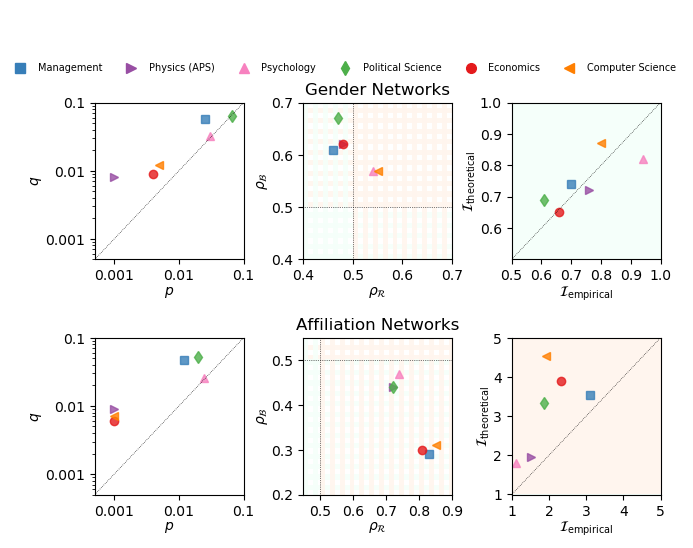

In [309]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.clf()
# Gender-partitioned networks
r_gender = [0.35, 0.16, 0.50, 0.34, 0.28, 0.26,]
p_gender = [0.025, 0.001, 0.030,  0.067,  0.004, 0.005]
q_gender = [0.058, 0.008, 0.032, 0.064, 0.009,  0.012]
rho_r_gender = [0.46, 0.48, 0.54, 0.47, 0.48, 0.55]
rho_b_gender =[0.61, 0.62, 0.57, 0.67, 0.62, 0.57]
I_empirical_gender = [0.70, 0.76, 0.94, 0.61, 0.66, 0.80]
I_theoretical_gender = [0.74, 0.72, 0.82, 0.69, 0.65, 0.87]


r_aff = [0.12, 0.22, 0.24, 0.18, 0.13, 0.09]
p_aff = [0.012, 0.001, 0.024, 0.020, 0.001, 0.001]
q_aff = [.048, 0.009, 0.026, 0.053, 0.006, 0.007]
rho_r_aff  =[0.83, 0.72, 0.74, 0.72, 0.81, 0.85]
rho_b_aff =  [0.29, 0.44, 0.47, 0.44, 0.30, 0.31]
I_empirical_aff =  [3.11, 1.52, 1.11, 1.86, 2.31, 1.91]
I_theoretical_aff = [3.53, 1.94, 1.79, 3.32, 3.89, 4.54]

mpl.rcParams.update(mpl.rcParamsDefault)
plt.clf()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(7.3, 4))

plot_table(p_gender, q_gender, rho_r_gender, rho_b_gender, I_empirical_gender, I_theoretical_gender, "table_gender", 0)
plot_table(p_aff, q_aff, rho_r_aff, rho_b_aff, I_empirical_aff, I_theoretical_aff, "table_affiliation", 1)

leg_lines = [] 
for field in fields:
    leg_lines.append(mlines.Line2D([], [], color=field_color[field], marker=field_marker[field], markersize=7, label=field_label[field], linestyle='None'))

fig.legend(leg_lines, labels, loc='center', ncol=6, fontsize=7, bbox_to_anchor=(0.47, +1.2), edgecolor = 'none')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

ax[0][1].set_title('Gender Networks', fontsize=12)
ax[1][1].set_title('Affiliation Networks', fontsize=12)
plt.savefig("{}.pdf".format("params_two"), bbox_inches='tight')
plt.show()


In [310]:
def all_one(p, q, rho_r, rho_b, I_empirical, I_theoretical, name, gender=0):
    
    xjump = 0.5 / 30 
    yjump = 0.5 / 30 
    
    for y in np.arange(0, 0.5, 2 * yjump):
        rec = Rectangle((0, y), 1.0, yjump)
        ax[1].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=0.9, zorder=1))
        
        rec = Rectangle((0, 0.5 + y), 1.0, yjump)
        ax[1].add_collection(PatchCollection([rec], facecolor='seashell', alpha=0.9, zorder=1))
        
    for y in np.arange(0, 0.5, 2 * xjump):
        rec = Rectangle((y, 0), xjump, 1.0)
        ax[1].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=0.9, zorder=1))
        
        rec = Rectangle((0.5 + y, 0), xjump, 1.0)
        ax[1].add_collection(PatchCollection([rec], facecolor='seashell', alpha=0.9, zorder=1))
        
    
    for y in np.arange(0, 1, 0.01):
        rec = Rectangle((0, y), 1, 0.01)
        ax[2].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
        
#         rec = Rectangle((y, 0), 0.01, 5)
#         ax[2].add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))
        
    for y in np.arange(1, 5, 0.01):
        rec = Rectangle((y, 1), 0.01, 5)
        ax[2].add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))
    
    for i, field in enumerate(fields):
        ax[0].scatter(p[i], q[i],
                  alpha=0.8,
                  zorder = 2,
                  label = field_label[field],
                  edgecolors = field_color[field],  
                  facecolor = field_color[field] if gender == 0 else 'none',
                  marker = field_marker[field]
                 )
        ax[1].scatter(rho_r[i], rho_b[i],
                  alpha=0.8,
                  zorder = 2,
                  label = field_label[field],
                  edgecolors = field_color[field],  
                  facecolor = field_color[field] if gender == 0 else 'none',
                  marker = field_marker[field]
                 )
        ax[2].scatter(I_empirical[i], I_theoretical[i],
                  alpha=0.8,
                  zorder = 2,
                  label = field_label[field],
                  edgecolors = field_color[field],    
                  facecolor = field_color[field] if gender == 0 else 'none',            
                  marker = field_marker[field]
                 )

    ax[0].set_xlabel(r'$p$',fontsize=10, labelpad=1)
    ax[0].set_ylabel(r'$q$',fontsize=10, labelpad=1)    
    ax[0].set_xscale('log')        
    ax[0].set_yscale('log')
    ax[0].set_xlim([0.0005,0.1])
    ax[0].set_ylim([0.0005,0.1])
    
    tck = [0.001, 0.01, 0.1]
    tck_lab = ["0.001", "0.01", "0.1"]
    ax[0].set_xticks(tck)
    ax[0].set_yticks(tck)
    ax[0].set_xticklabels(tck_lab)
    ax[0].set_yticklabels(tck_lab)
    
    ax[0].plot(np.linspace(0.0005,0.1,50), np.linspace(0.0005,0.1,50), linestyle = ':', c='k', linewidth = 0.5)

    ax[1].set_xlabel(r'$\rho_{\mathcal{R}}$',fontsize=10, labelpad=1)
    ax[1].set_ylabel(r'$\rho_{\mathcal{B}}$',fontsize=10, labelpad=1)
    

    ax[1].set_xlim([0.4,0.9])
    ax[1].set_ylim([0.2,0.7])
    xtck = np.arange(0.5, 0.91, 0.1)
    ytck = np.arange(0.2, 0.71, 0.1)
        
    xtck_lab = ["{0:.1f}".format(el) for el in xtck]
    ytck_lab = ["{0:.1f}".format(el) for el in ytck]
    ax[1].set_xticks(xtck)
    ax[1].set_yticks(ytck)
    ax[1].set_xticklabels(xtck_lab)
    ax[1].set_yticklabels(ytck_lab)
        
    ax[1].axhline(0.5,linestyle = ':', c='k', linewidth = 0.5)
    ax[1].axvline(0.5,linestyle = ':', c='k', linewidth = 0.5)
    ax[2].set_xlabel(r'$\mathcal{I}_{\mathrm{empirical}}$',fontsize=10, labelpad=1)
    ax[2].set_ylabel(r'$\mathcal{I}_{\mathrm{theoretical}}$',fontsize=10, labelpad=1)
   
    ax[2].set_xscale('log')        
    ax[2].set_yscale('log')
    ax[2].set_xlim([0.5,5])
    ax[2].set_ylim([0.5,5])
    tck = [0.6, 0.8, 1, 2, 3, 4, 5]
    tck_lab = ["{0:.1f}".format(el) for el in tck]
    ax[2].set_xticks(tck)
    ax[2].set_yticks(tck)
    ax[2].set_xticklabels(tck_lab, rotation=90)
    ax[2].set_yticklabels(tck_lab)
        
    ax[2].plot(np.linspace(0.5,5,50), np.linspace(0.5,5,50), linestyle = ':', c='k', linewidth = 0.5)

#     fig.subplots_adjust(bottom = 0.08, wspace=0.4, hspace=0.0) 


<Figure size 640x480 with 0 Axes>

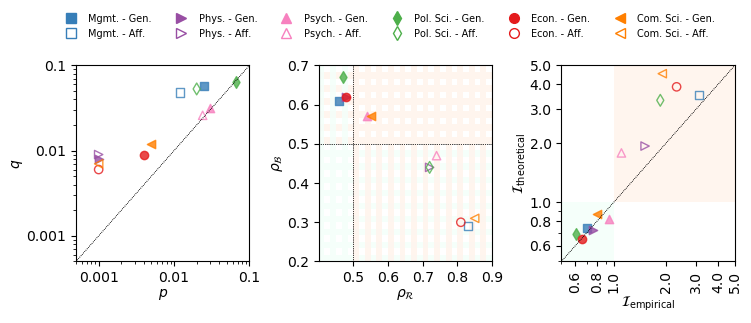

In [311]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.clf()
# Gender-partitioned networks
r_gender = [0.35, 0.16, 0.50, 0.34, 0.28, 0.26,]
p_gender = [0.025, 0.001, 0.030,  0.067,  0.004, 0.005]
q_gender = [0.058, 0.008, 0.032, 0.064, 0.009,  0.012]
rho_r_gender = [0.46, 0.48, 0.54, 0.47, 0.48, 0.55]
rho_b_gender =[0.61, 0.62, 0.57, 0.67, 0.62, 0.57]
I_empirical_gender = [0.70, 0.76, 0.94, 0.61, 0.66, 0.80]
I_theoretical_gender = [0.74, 0.72, 0.82, 0.69, 0.65, 0.87]


r_aff = [0.12, 0.22, 0.24, 0.18, 0.13, 0.09]
p_aff = [0.012, 0.001, 0.024, 0.020, 0.001, 0.001]
q_aff = [.048, 0.009, 0.026, 0.053, 0.006, 0.007]
rho_r_aff  =[0.83, 0.72, 0.74, 0.72, 0.81, 0.85]
rho_b_aff =  [0.29, 0.44, 0.47, 0.44, 0.30, 0.31]
I_empirical_aff =  [3.11, 1.52, 1.11, 1.86, 2.31, 1.91]
I_theoretical_aff = [3.53, 1.94, 1.79, 3.32, 3.89, 4.54]

field_label = {
    'economics': 'Econ.',
    'management': 'Mgmt.',
    'psychology': 'Psych.',
    'aps': 'Phys.',
    'political_science': 'Pol. Sci.',
    'cs': 'Com. Sci.'
}

mpl.rcParams.update(mpl.rcParamsDefault)
plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.5, 2))

all_one(p_gender, q_gender, rho_r_gender, rho_b_gender, I_empirical_gender, I_theoretical_gender, "table_gender", 0)
all_one(p_aff, q_aff, rho_r_aff, rho_b_aff, I_empirical_aff, I_theoretical_aff, "table_affiliation", 1)

leg_lines = [] 
for field in fields:
    leg_lines.append(mlines.Line2D([], [], color=field_color[field], marker=field_marker[field], markersize=7, label="{} - Gen.".format(field_label[field]), linestyle='None'))
    leg_lines.append(mlines.Line2D([], [], markeredgecolor=field_color[field], marker=field_marker[field], markersize=7, label="{} - Aff.".format(field_label[field]), linestyle='None', markerfacecolor='none'))

# fig.legend(leg_lines, labels, loc='center', ncol=6, fontsize=7, bbox_to_anchor=(0.5, +1.5), edgecolor = 'none')

plt.legend(handles=leg_lines, prop={'size': 7}, facecolor='white', ncol=6, framealpha=1, frameon=True, bbox_to_anchor=(-1, +1.2), edgecolor = 'none', loc='center')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.7, wspace=0.4)

plt.savefig("{}.pdf".format("params_one"), bbox_inches='tight')
plt.show()
